## Holidays Sales Analysis

#### PANDAS

Pandas  [DOCS](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

![pandas](https://media.giphy.com/media/zrdUjl6N99nLq/giphy.gif) 

#### MATPLOTLIB - SEABORN


Seaborn [DOCS](https://seaborn.pydata.org/tutorial.html). 
MatPlotLib [DOCS](https://matplotlib.org/3.5.1/index.html).



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#from google.colab import drive
#drive.mount('/content/drive/Data')

ValueError: ignored

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Data/ajax_sales.csv')
df

,Unnamed: 0,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,cog
0,0,2020-08-01,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
1,1,2020-08-02,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
2,2,2020-08-03,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
3,3,2020-08-04,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,1.45
4,4,2020-08-05,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,1.45
...,...,...,...,...,...,...,...,...,...,...,...
143915,143915,2020-05-28,51F000021,NaN,NaN,NaN,7.92,7.92,1.0,7.92,NaN
143916,143916,2020-05-29,51F000021,NaN,NaN,NaN,7.92,7.92,1.0,7.92,NaN
143917,143917,2020-05-30,51F000021,NaN,NaN,NaN,7.92,7.92,1.0,7.92,NaN
143918,143918,2020-06-01,51F000021,NaN,NaN,NaN,7.13,7.92,3.0,22.97,NaN


In [12]:
df = df.drop(['Unnamed: 0', 'cog'], axis=1)
# a lot of pandas functions and methods has 'axis' as an argument, it tells us if we are working column wise (1) or row wise (0)
df

,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value
0,2020-08-01,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83
1,2020-08-02,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83
2,2020-08-03,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83
3,2020-08-04,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49
4,2020-08-05,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49
...,...,...,...,...,...,...,...,...,...
143915,2020-05-28,51F000021,NaN,NaN,NaN,7.92,7.92,1.0,7.92
143916,2020-05-29,51F000021,NaN,NaN,NaN,7.92,7.92,1.0,7.92
143917,2020-05-30,51F000021,NaN,NaN,NaN,7.92,7.92,1.0,7.92
143918,2020-06-01,51F000021,NaN,NaN,NaN,7.13,7.92,3.0,22.97


### BASIC DATA CLEANING

Not always our dataset will be ready for our analysis. We might need to change values (fix, standardize, bucket, drop, etc.) according to what we want to analyze.

In [ ]:
# checking our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143920 entries, 0 to 143919
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date_created   143888 non-null  object 
 1   sku            143920 non-null  object 
 2   season         143920 non-null  object 
 3   category       143920 non-null  object 
 4   subcategory    143920 non-null  object 
 5   price_min      143920 non-null  float64
 6   price_max      143920 non-null  float64
 7   quantity_sold  143636 non-null  float64
 8   total_value    143911 non-null  float64
 9   cog            120484 non-null  float64
dtypes: float64(5), object(5)
memory usage: 11.0+ MB


We see here:
* Nulls: which are values left empty and need to be delt with for the analysis;
* Type: which tells if we have text, number or date as values for a certain column.

In [ ]:
# Nulls
df.dropna() # drops all rows with NaNs/nulls

,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,cog
0,2020-08-01,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
1,2020-08-02,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
2,2020-08-03,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
3,2020-08-04,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,1.45
4,2020-08-05,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,1.45
...,...,...,...,...,...,...,...,...,...,...
143891,2020-02-24,9AA092,All Year,Stationery,UNKNOWN,12.50,12.50,1.0,12.50,6.00
143892,2020-03-02,9AA092,All Year,Stationery,UNKNOWN,12.50,12.50,1.0,12.50,6.00
143893,2020-03-03,9AA092,All Year,Stationery,UNKNOWN,12.50,12.50,1.0,12.50,6.00
143894,2020-03-12,9AA092,All Year,Stationery,UNKNOWN,12.50,12.50,1.0,12.50,6.00


In [ ]:
# dropped too many, let's replace the nulls from Subcategory, Category and Season with 'UNKNOWN'
df[['sku', 'category', 'subcategory', 'season']] = df[['sku', 'category', 'subcategory', 'season']].fillna('UNKNOWN')
df

,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,cog
0,2020-08-01,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
1,2020-08-02,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
2,2020-08-03,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,1.45
3,2020-08-04,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,1.45
4,2020-08-05,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,1.45
...,...,...,...,...,...,...,...,...,...,...
143915,2020-05-28,51F000021,UNKNOWN,UNKNOWN,UNKNOWN,7.92,7.92,1.0,7.92,NaN
143916,2020-05-29,51F000021,UNKNOWN,UNKNOWN,UNKNOWN,7.92,7.92,1.0,7.92,NaN
143917,2020-05-30,51F000021,UNKNOWN,UNKNOWN,UNKNOWN,7.92,7.92,1.0,7.92,NaN
143918,2020-06-01,51F000021,UNKNOWN,UNKNOWN,UNKNOWN,7.13,7.92,3.0,22.97,NaN


In [ ]:
# ideally, you should analyze the row you dropped , but we'll skip that
df = df.dropna()
df

,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,month
0,2020-08-01,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,8.0
1,2020-08-02,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,8.0
2,2020-08-03,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,8.0
3,2020-08-04,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,8.0
4,2020-08-05,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,8.0
...,...,...,...,...,...,...,...,...,...,...
143612,2021-07-05,A9D000033,All Year,Wedding,Favours,0.00,0.00,115.0,0.00,7.0
143613,2021-07-05,A9D000034,All Year,Wedding,Favours,0.00,0.00,75.0,0.00,7.0
143614,2021-08-18,A9D000044,All Year,Stationery,Guest Book,27.70,27.70,1.0,27.70,8.0
143615,2021-09-30,A9D000046,All Year,Stationery,Guest Book,27.71,27.71,1.0,27.71,9.0


### Basic Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,price_min,price_max,quantity_sold,total_value,month
count,21791.000000,21791.000000,21791.000000,21791.000000,21791.00000
mean,6.684050,7.760572,4.437704,29.715767,6.35969
std,4.680457,4.147665,7.514457,45.822777,3.25443
min,0.000000,0.000000,1.000000,0.000000,1.00000
25%,4.170000,5.000000,1.000000,8.330000,4.00000
50%,6.670000,7.500000,2.000000,15.000000,6.00000
75%,8.750000,9.170000,5.000000,33.750000,9.00000
max,37.500000,37.500000,215.000000,1073.700000,12.00000


In [ ]:
# SOME PANDAS
## slicing a data set can be done column-wise by selecting 
df['category'] # Series = a column in a dataframe

0                Home
1                Home
2                Home
3                Home
4                Home
             ...     
143612        Wedding
143613        Wedding
143614    Stationery 
143615    Stationery 
143616    Stationery 
Name: category, Length: 21791, dtype: object

In [ ]:
df[['category', 'subcategory']] # DataFrame = a collection of series

,category,subcategory
0,Home,Fabric
1,Home,Fabric
2,Home,Fabric
3,Home,Fabric
4,Home,Fabric
...,...,...
143612,Wedding,Favours
143613,Wedding,Favours
143614,Stationery,Guest Book
143615,Stationery,Guest Book


In [ ]:
df[['category']] # DataFrame with just one column

,category
0,Home
1,Home
2,Home
3,Home
4,Home
...,...
143612,Wedding
143613,Wedding
143614,Stationery
143615,Stationery


In [ ]:
df['category'].value_counts()

Home                    8494
Food & Drink            7543
Stationery              3375
Pamper                  1599
Accessories & Fabric     765
Wedding                   12
Stationery                 3
Name: category, dtype: int64

In [ ]:
# filtering, it's like slicing but with a condition
df[df['category'] == 'Food & Drink']

,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,month
35902,2020-02-12,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,2.0
35903,2020-02-13,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,2.0
35904,2020-02-29,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,2.0
35905,2020-03-25,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,3.0
35906,2020-04-21,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,4.0
...,...,...,...,...,...,...,...,...,...,...
44692,2021-09-12,4A7000099,All Year,Food & Drink,Chocolate,3.17,3.17,1.0,3.17,9.0
44693,2021-09-13,4A7000099,All Year,Food & Drink,Chocolate,0.00,3.17,4.0,9.35,9.0
44694,2021-09-14,4A7000099,All Year,Food & Drink,Chocolate,2.85,3.17,4.0,12.36,9.0
44695,2021-09-15,4A7000099,All Year,Food & Drink,Chocolate,3.17,3.17,1.0,3.17,9.0


In [ ]:
condition = df['category'] == 'Food & Drink'
df[condition]

,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,month
35902,2020-02-12,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,2.0
35903,2020-02-13,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,2.0
35904,2020-02-29,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,2.0
35905,2020-03-25,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,3.0
35906,2020-04-21,4A7000004,All Year,Food & Drink,Chocolate,13.33,13.33,1.0,13.33,4.0
...,...,...,...,...,...,...,...,...,...,...
44692,2021-09-12,4A7000099,All Year,Food & Drink,Chocolate,3.17,3.17,1.0,3.17,9.0
44693,2021-09-13,4A7000099,All Year,Food & Drink,Chocolate,0.00,3.17,4.0,9.35,9.0
44694,2021-09-14,4A7000099,All Year,Food & Drink,Chocolate,2.85,3.17,4.0,12.36,9.0
44695,2021-09-15,4A7000099,All Year,Food & Drink,Chocolate,3.17,3.17,1.0,3.17,9.0


In [ ]:
# grouping
cat_df = df.groupby('category').sum()
cat_df

,price_min,price_max,quantity_sold,total_value,month
category,,,,,
Accessories & Fabric,9864.59,10144.83,1050.0,12725.17,3825.0
Food & Drink,39417.21,47263.58,45995.0,256211.20,50180.0
Home,64738.19,78051.79,37548.0,314435.87,53669.0
Pamper,6256.98,7801.11,6750.0,30280.41,10748.0
Stationery,25289.81,25763.96,4531.0,33779.63,20049.0
Stationery,84.58,84.58,3.0,84.58,25.0
Wedding,0.77,0.77,825.0,19.41,88.0


In [ ]:
best_cats = cat_df['total_value'].sort_values(ascending=False)
best_cats

category
Home                    314435.87
Food & Drink            256211.20
Stationery               33779.63
Pamper                   30280.41
Accessories & Fabric     12725.17
Stationery                  84.58
Wedding                     19.41
Name: total_value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


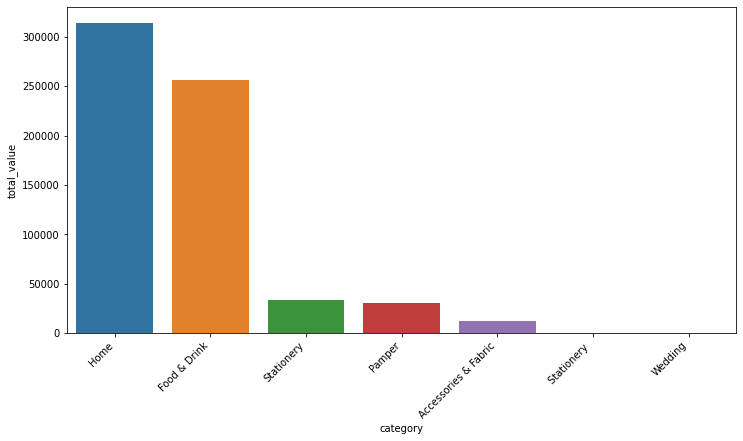

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6)) # starts a space where we can have one or more plots

sns.barplot(best_cats.index, best_cats) # the actual plot, where we select what will be x and y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # method to edit axis labels, to make it prettier
plt.show() # to display plot without extra info

In [ ]:
import numpy as np
cat_df_avg = df.groupby('category').agg(np.mean)
cat_df_avg

,price_min,price_max,quantity_sold,total_value,month
category,,,,,
Accessories & Fabric,12.894889,13.261216,1.372549,16.634209,5.000000
Food & Drink,5.225668,6.265886,6.097706,33.966751,6.652526
Home,7.621638,9.189050,4.420532,37.018586,6.318460
Pamper,3.913058,4.878743,4.221388,18.937092,6.721701
Stationery,7.493277,7.633766,1.342519,10.008779,5.940444
Stationery,28.193333,28.193333,1.000000,28.193333,8.333333
Wedding,0.064167,0.064167,68.750000,1.617500,7.333333


In [ ]:
best_cats_avg = cat_df_avg['total_value'].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


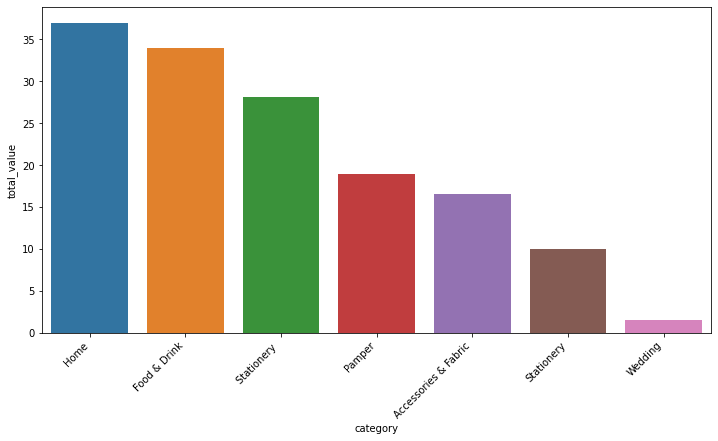

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6)) # starts a space where we can have one or more plots

sns.barplot(best_cats_avg.index, best_cats_avg) # the actual plot, where we select what will be x and y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # method to edit axis labels, to make it prettier
plt.show() # to display plot without extra info


Insight: even though we have higher value of sales for Food and Drink category, Plants and Flower have a higher average value, so you'd need to sell them less to achieve the same total value as Food and Drink. Other then that, we'd need to understand profit to make better decisions. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


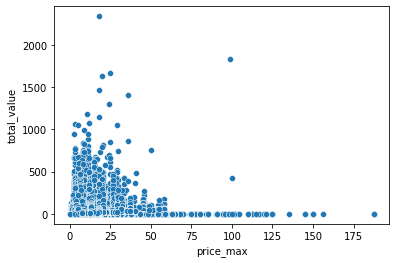

In [ ]:
# Checking Correlations
# just to show a scatter plot, where we can check for correlation between continuous variables
sns.scatterplot(df['price_max'], df['total_value'])
# here the correlation is that the higher price_max, the higher total_value
# exception can be observed on total_value = 0, where we see many high price_max - we'd have to analize this factor, but i won't do it here

In [ ]:
# Getting Holidayzy
# Let's say we want to know if month is related to the amount of sales:

# 1. create a new column with month
df['month'] = pd.to_datetime(df['date_created']).dt.month
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date_created,sku,season,category,subcategory,price_min,price_max,quantity_sold,total_value,month
0,2020-08-01,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,8
1,2020-08-02,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,8
2,2020-08-03,C4F000001,All Year,Home,Fabric,5.83,5.83,1.0,5.83,8
3,2020-08-04,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,8
4,2020-08-05,C4F000001,All Year,Home,Fabric,5.83,5.83,3.0,17.49,8
...,...,...,...,...,...,...,...,...,...,...
143612,2021-07-05,A9D000033,All Year,Wedding,Favours,0.00,0.00,115.0,0.00,7
143613,2021-07-05,A9D000034,All Year,Wedding,Favours,0.00,0.00,75.0,0.00,7
143614,2021-08-18,A9D000044,All Year,Stationery,Guest Book,27.70,27.70,1.0,27.70,8
143615,2021-09-30,A9D000046,All Year,Stationery,Guest Book,27.71,27.71,1.0,27.71,9


Read about Acessors [here](https://towardsdatascience.com/pandas-dtype-specific-operations-accessors-c749bafb30a4).

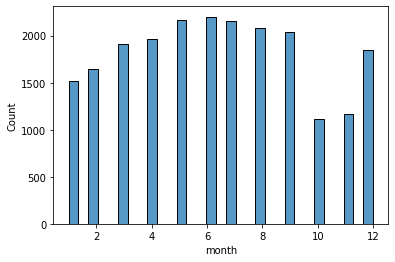

In [ ]:
# 2. Check distributions of amount of sales per month
sns.histplot(df['month'])
# distribution here is telling us that the amount of sales is higher on months 6-7 and lower on months 10-11

In [ ]:
# 3. Check distributions for total_values of sales
df_ = df.groupby('month').sum()
df_

,price_min,price_max,quantity_sold,total_value
month,,,,
1,8391.04,11851.61,8391.0,53888.91
2,10754.57,12996.92,10274.0,70728.33
3,13156.04,14702.72,11612.0,79488.48
4,13980.52,15244.57,6327.0,45827.20
5,16206.94,17523.94,6937.0,48874.35
6,15887.13,17228.12,7377.0,51624.50
7,14842.53,16480.10,7217.0,44149.83
8,14936.65,16067.16,5771.0,40783.79
9,15017.36,16260.84,5609.0,40480.99


In [ ]:
x = df_.index
x

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [ ]:
y = df_['total_value']
y

month
1      53888.91
2      70728.33
3      79488.48
4      45827.20
5      48874.35
6      51624.50
7      44149.83
8      40783.79
9      40480.99
10     26984.95
11     41241.21
12    103463.73
Name: total_value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


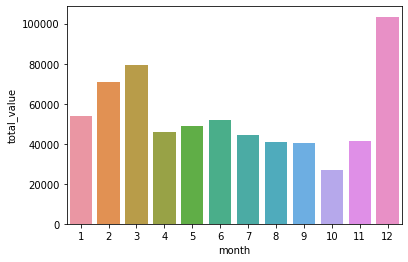

In [ ]:
sns.barplot(x, y)

Insight: even though the volume of sales is bigger on months 6-7 and not so expressive for month 12, month 12 is where the value of the sales are highest, so the company is sells less, but more expensive items.

![](https://raw.githubusercontent.com/Sven-Bo/happy-holidays-streamlit-app/master/demo.gif)